### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [49]:
import pandas as pd

In [50]:
## Data Ingestion

df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [51]:
#Look for null values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing Values present in the data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


8 Numerical Features

3 Categorical Features

In [53]:
## Let's Drop id column

df = df.drop(labels=['id'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [54]:
## Check For Duplicates

df.duplicated().sum()

0

In [55]:
## Let's segregate Numerical Features from Categorical Features For EDA purpose

numerical_feat = df.columns[df.dtypes!="object"]
categorical_feat = df.columns[df.dtypes=="object"]

print(numerical_feat)
print(categorical_feat)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [56]:
df[categorical_feat].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [57]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [58]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

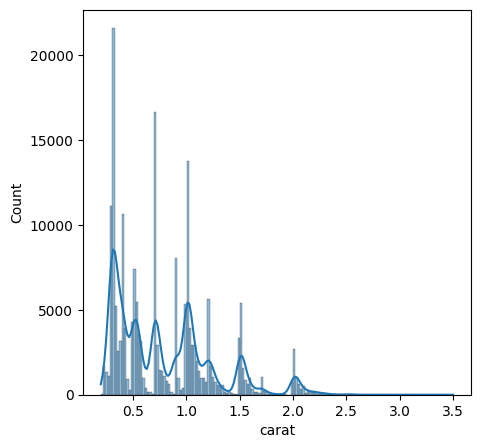

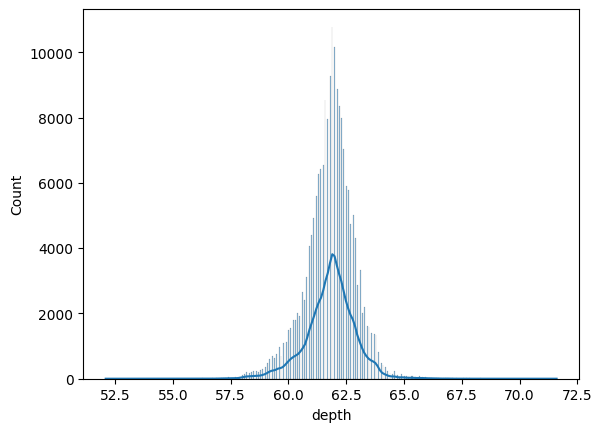

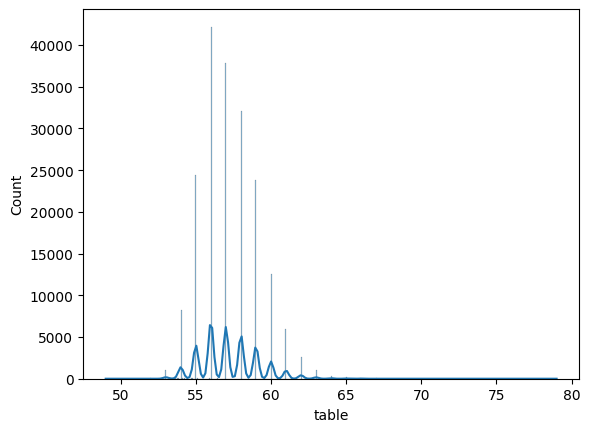

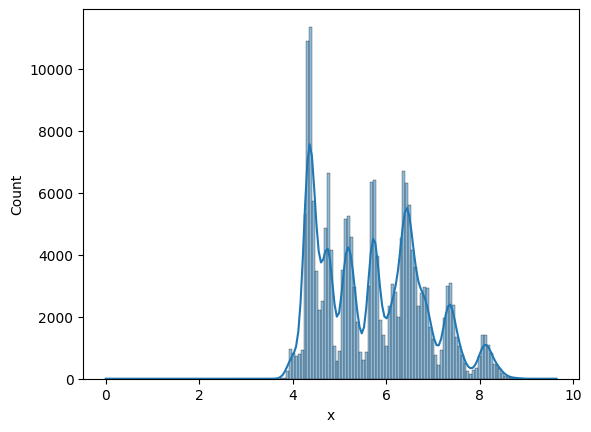

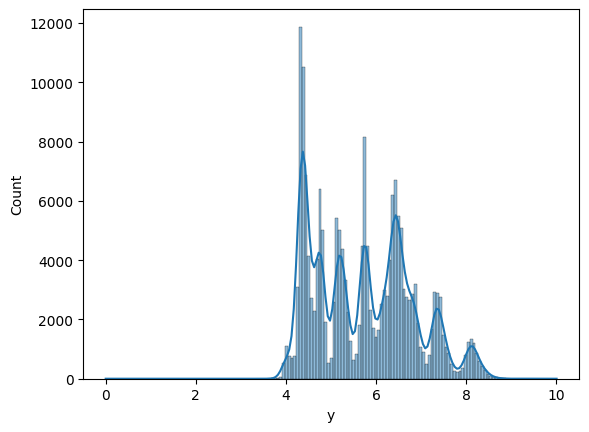

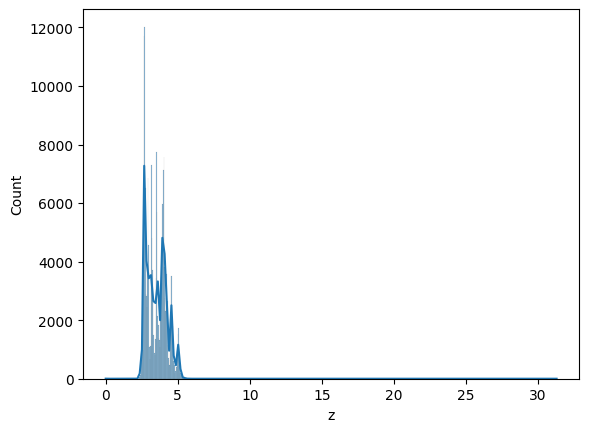

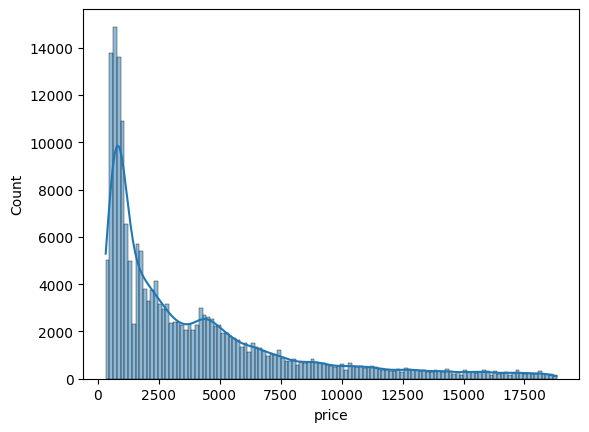

In [60]:
plt.figure(figsize=(5, 5))
x = 0
for i in numerical_feat:
    sns.histplot(data=df, x=i, kde=True)
    print('\n')
    plt.show()

<Figure size 500x500 with 0 Axes>

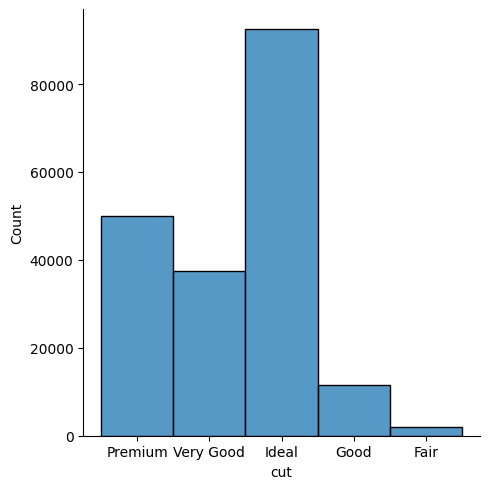

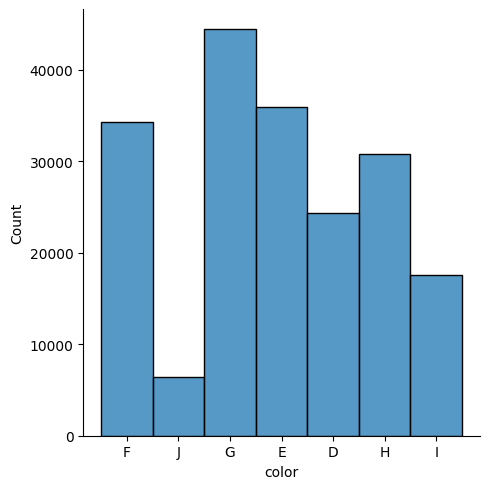

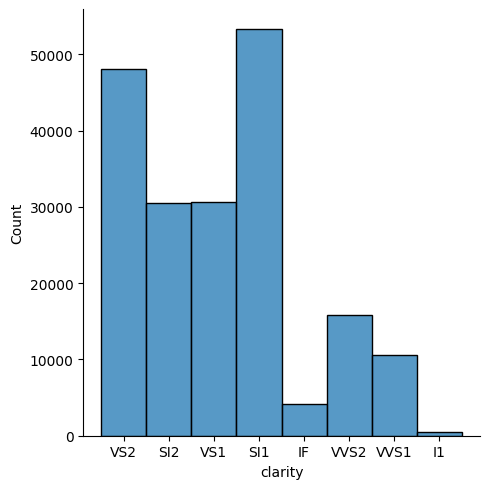

In [61]:
plt.figure(figsize=(5, 5))
for i in categorical_feat:
    sns.displot(data=df, x=i)
    print("\n")
    plt.show()
    

<Axes: >

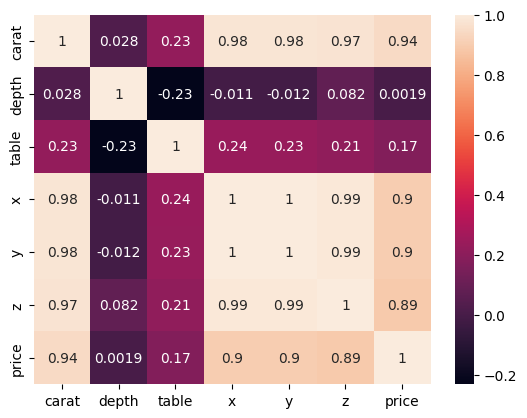

In [62]:
## Let's Look at the correlations

# Heatmap can only show correlation between numerical features.

sns.heatmap(df[numerical_feat].corr(), annot=True)

As we can see, the features [x, y, z] are highly correlated to each other. 

We can also see that those 3 features are highly correlated to [carat] feature. 

To avoid Multicolinearity, We should drop [x, y, z] features.

But for now we won't drop them.

In [63]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Now, Let's start working towards converting the categorical features into Numerical Features. 

From what we can see, Cut, color, and clarity are all ordinal features. 

They all have some sort of ranking to them.

Let's search on internet to find what is the ranking order for them.

In [64]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

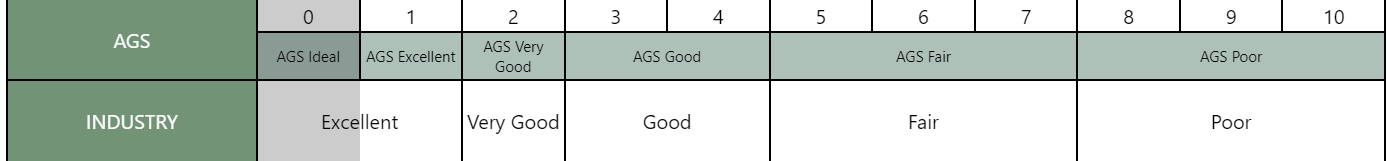

Ideal > Premium > Very Good > Good > Fair

Now, let's rank them numerically. 

In [65]:
cut_map = {"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 2, "Fair": 1}

In [66]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

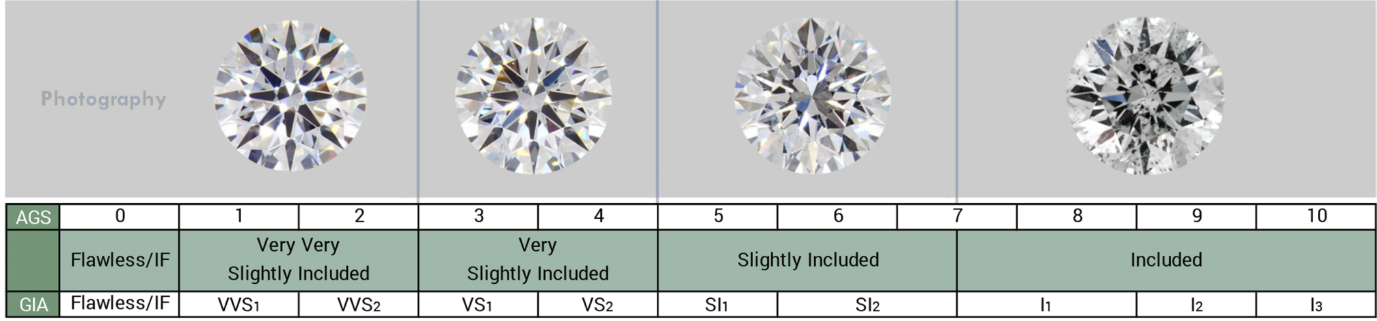

IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1

Let's Rank these too numerically 

In [67]:
clarity_map = {"IF":8, "VVS1": 7, "VVS2": 6, "VS1": 5, "VS2": 4, "SI1": 3, "SI2": 2, "I1": 1}

In [68]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

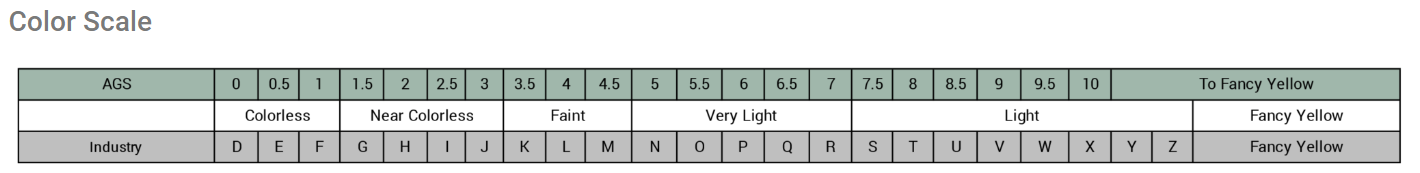

D > E > F > G > H > I > J

In [69]:
color_map = {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}

Now, Let's map them onto the dataset to change the features to numerical features. 

In [70]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

We can use replace function as well.

EX - df['color']=df['color'].replace(color_map)

In [71]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
